<a href="https://colab.research.google.com/github/marcosfelt/interview_study_plan/blob/main/algorithms/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-nearest neighbors

Approach:

* Take in an array $X$ of dimension $mxd$ where $m$ is the number of examples and $d$ is the number of features, and also take in $y$ of dimension $mx1$.
* For a query matrix $x_q$ of dimension $mxn$ calculate the pairwise distance between each example $x^q_i$ and every row in $X$:
$$D(x^q_i,X)= ||x^q_i - X||_2$$
* Sort $D(x_q,X)$ and select the top k closest rows, then average to get the prediction. If classification apply cutoff (e.g., >0.5) to get label.

Time complexity: $O(m*n*d)$

Space complexity: $O(m*n)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Parameters
seed = 100
m = 100 # number of training examples
n = 20 # number of test exampls
d = 2 # features
k = 5 # number of neighbors

# Generate data
rng = np.random.default_rng(seed)
X = rng.normal(size=(m,d))
f = lambda x:  x[:, 0]**2 + 2*x[:, 1] + 0.01*rng.normal(size=x.shape[0])
y = f(X)
x_q = rng.normal(size=(n, d))
y_q = f(x_q)

In [9]:
def pairwise_distance(x_q: np.ndarray, X: np.ndarray):
  d = np.zeros((x_q.shape[0], X.shape[0]))
  for i in range(x_q.shape[0]):
    d[i, :] = (((x_q[i, :] - X)**2).sum(axis=1))**0.5
  return d

def knn(X: np.ndarray, y: np.ndarray, x_q: np.ndarray, k: int):
  d = pairwise_distance(x_q, X)
  sorted_idx = np.argsort(d, axis=1)
  selected_idx = sorted_idx[:, :k]
  selected = y[selected_idx]
  return np.mean(selected, axis=1), selected_idx

In [10]:
# Make predictions
y_hat, idx = knn(X, y, x_q, k)

Prediction:  3.39, Ground truth: 3.57
K-nearest neighbors: [3.51504914 4.49910912 2.74882261 3.66600527 2.51965748]


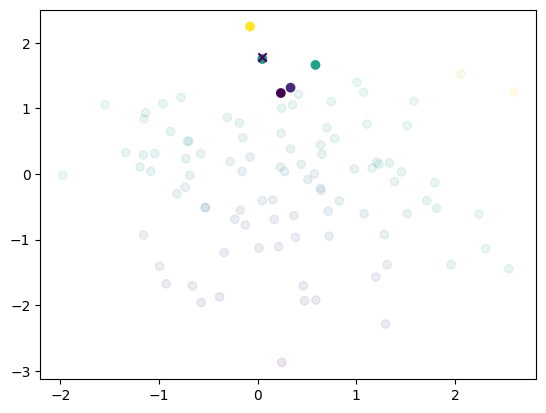

In [11]:
# Example
ex = 3
idx_ex = idx[ex,:]
print(f"Prediction: {y_hat[ex]: .02f}, Ground truth: {y_q[ex]:.02f}")
print(f"K-nearest neighbors: {y[idx_ex]}")
plt.scatter(X[:, 0], X[:,1], c=y, alpha=0.1)
plt.scatter(X[idx_ex, 0], X[idx_ex,1], c=y[idx_ex])
_ = plt.scatter(x_q[ex, 0], x_q[ex, 1], c=y_hat[ex], marker="x")

In [12]:
# Mean absolute error
mae = np.mean(np.abs(y_hat - y_q))
print(f"Mean absolute error: {mae:.02f}")

Mean absolute error: 0.40


In [15]:
# Check against scikit-learn implementation
knn_skl = KNeighborsRegressor(algorithm="brute")
knn_skl.fit(X, y)
y_hat_skl = knn_skl.predict(x_q)
mae = np.mean(np.abs(y_hat_skl - y_q))
print(f"Mean absolute error scikit-learn: {mae:.02f}")
assert np.isclose(y_hat,  y_hat_skl).all()

Mean absolute error scikit-learn: 0.40
